# Shoppers intent prediction part 1

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/gagan3012/online-shoppers-intention-/master/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
df.shape

(12330, 18)

In [5]:
(df.isna().sum()/df.shape[0])*100

Administrative             0.113544
Administrative_Duration    0.113544
Informational              0.113544
Informational_Duration     0.113544
ProductRelated             0.113544
ProductRelated_Duration    0.113544
BounceRates                0.113544
ExitRates                  0.113544
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [6]:
df[df.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [7]:
df=df.dropna()

In [8]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [9]:
cat_cols = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
numeric_cols = list(set(df.columns)-set(cat_cols+['Month']))
cat_dtype = pd.api.types.CategoricalDtype(categories=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ordered=True)

In [10]:
df[cat_cols]= df[cat_cols].astype('category')
df[['Administrative','Informational','ProductRelated']]=df[['Administrative','Informational','ProductRelated']].astype('int')
df['Month']=df['Month'].astype(cat_dtype)
cat_cols+=['Month']

In [14]:
df[cat_cols].describe()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month
count,12316,12316,12316,12316,12316,12316,12316,12316
unique,8,13,9,20,3,2,2,10
top,2,2,1,2,Returning_Visitor,False,False,May
freq,6593,7951,4774,3909,10537,9451,10408,3363


In [13]:
df[numeric_cols].describe()

,ExitRates,ProductRelated_Duration,PageValues,Informational_Duration,BounceRates,SpecialDay,Administrative_Duration,Informational,Administrative,ProductRelated
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.043003,1196.037057,5.895952,34.506387,0.022152,0.061497,80.906176,0.503979,2.317798,31.763884
std,0.048527,1914.372511,18.577926,140.825479,0.048427,0.199020,176.860432,1.270701,3.322754,44.490339
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.014286,185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.025124,599.766190,0.000000,0.000000,0.003119,0.000000,8.000000,0.000000,1.000000,18.000000
75%,0.050000,1466.479902,0.000000,0.000000,0.016684,0.000000,93.500000,0.000000,4.000000,38.000000
max,0.200000,63973.522230,361.763742,2549.375000,0.200000,1.000000,3398.750000,24.000000,27.000000,705.000000


In [15]:
df[numeric_cols] = df[numeric_cols].clip(lower=0)

In [16]:
df[numeric_cols].describe()

,ExitRates,ProductRelated_Duration,PageValues,Informational_Duration,BounceRates,SpecialDay,Administrative_Duration,Informational,Administrative,ProductRelated
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,0.043003,1196.039736,5.895952,34.509067,0.022152,0.061497,80.908856,0.503979,2.317798,31.763884
std,0.048527,1914.370836,18.577926,140.824813,0.048427,0.199020,176.859199,1.270701,3.322754,44.490339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014286,185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.025124,599.766190,0.000000,0.000000,0.003119,0.000000,8.000000,0.000000,1.000000,18.000000
75%,0.050000,1466.479902,0.000000,0.000000,0.016684,0.000000,93.500000,0.000000,4.000000,38.000000
max,0.200000,63973.522230,361.763742,2549.375000,0.200000,1.000000,3398.750000,24.000000,27.000000,705.000000


In [18]:
df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

# Visualisation of data
we will visual data to understand 

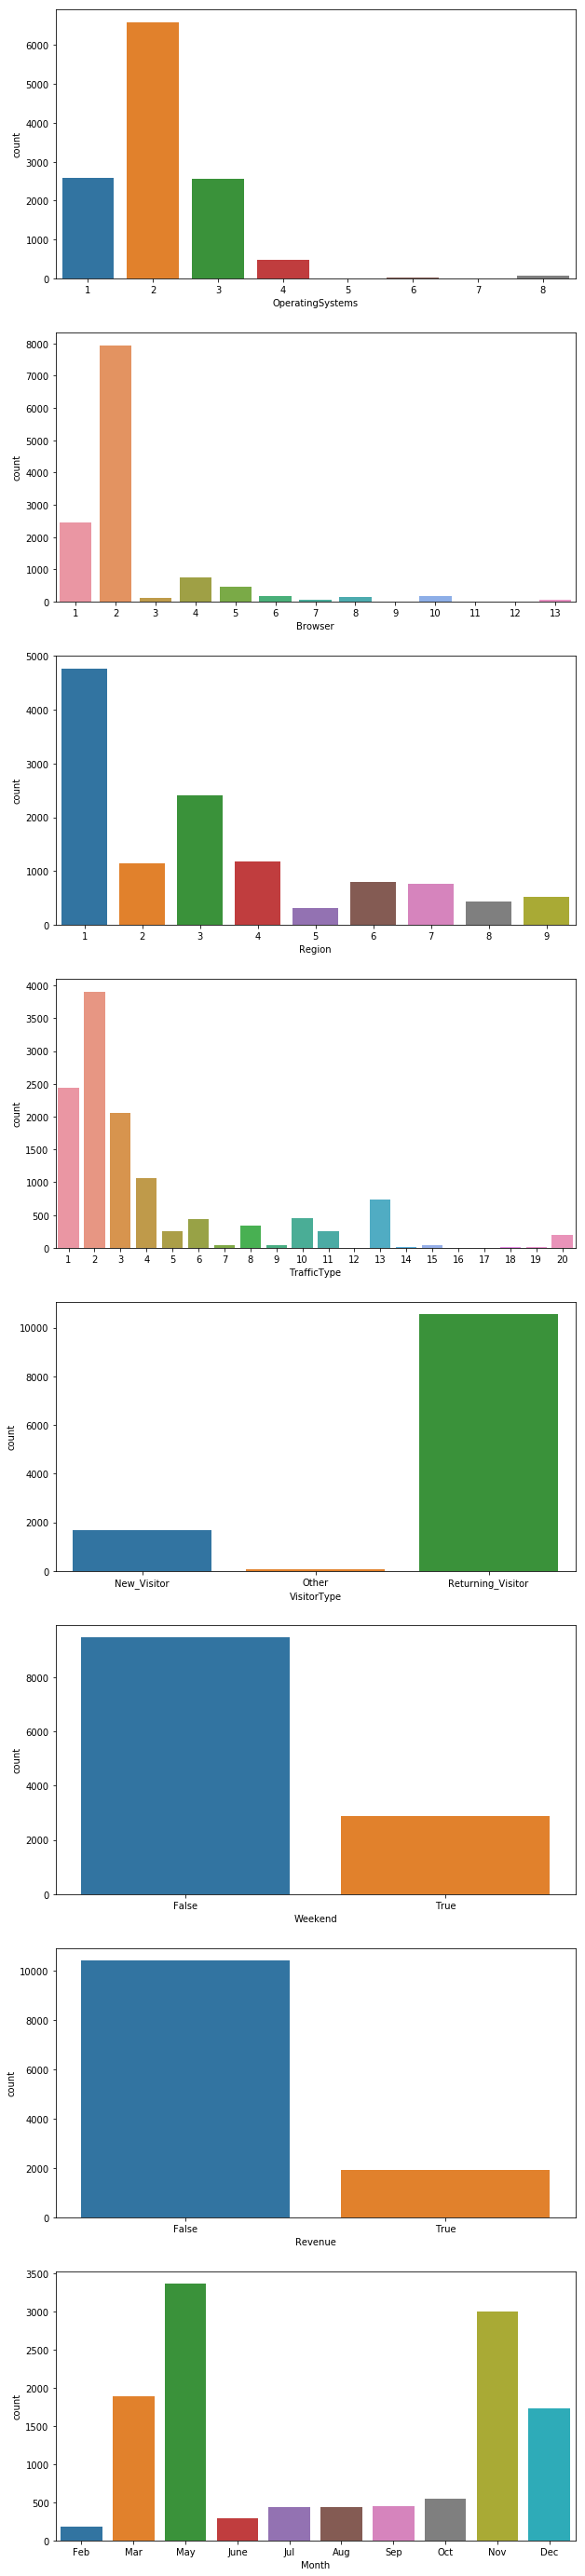

In [19]:
f,ax =plt.subplots(len(cat_cols),1,figsize=(10,50))
for idx,col in enumerate(cat_cols):
        sns.countplot(x=col,data=df[cat_cols],ax=ax[idx])

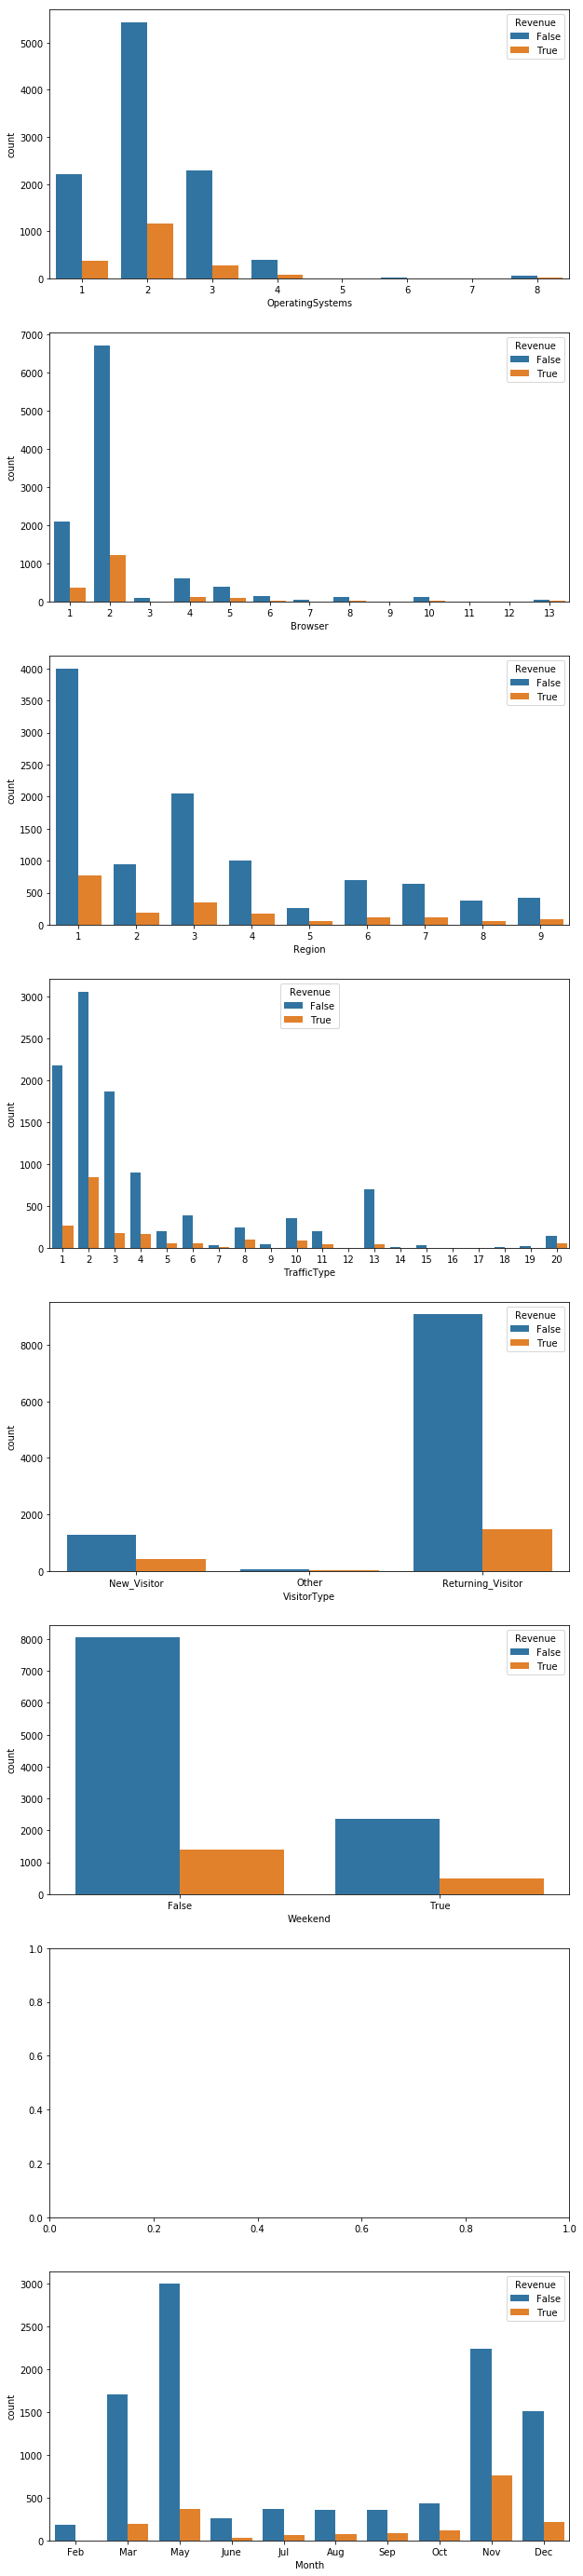

In [20]:
f,ax =plt.subplots(len(cat_cols),1,figsize=(10,50))
for idx,col in enumerate(cat_cols):
    if col!='Revenue':
        sns.countplot(x=col,data=df[cat_cols],hue='Revenue',ax=ax[idx])

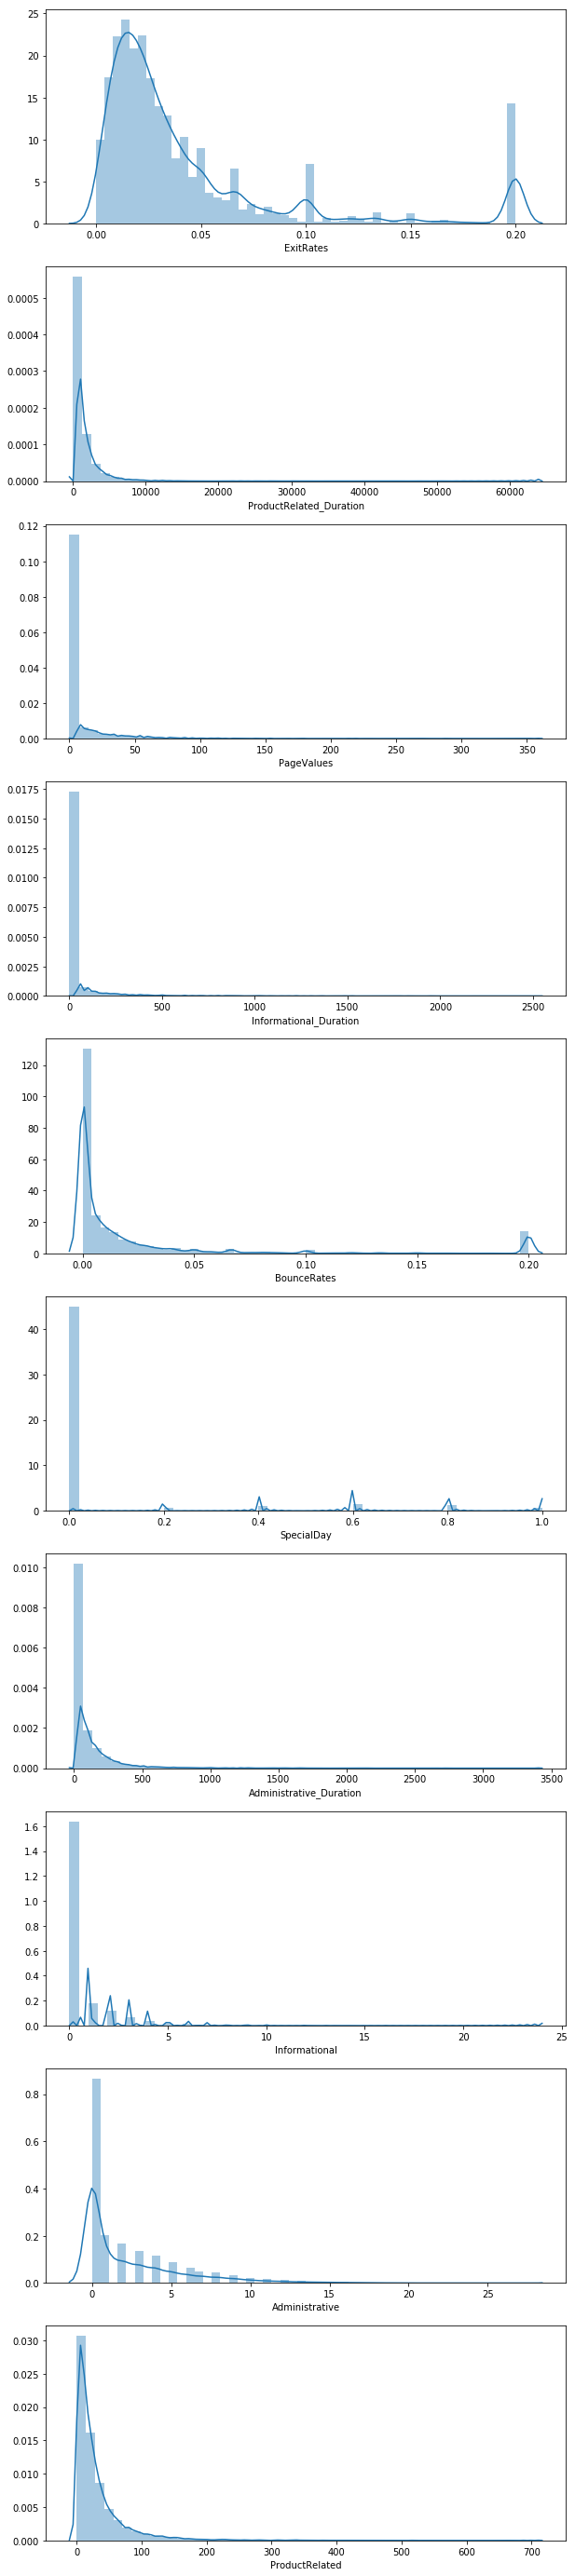

In [21]:

f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.distplot(df[col],ax=ax[idx])

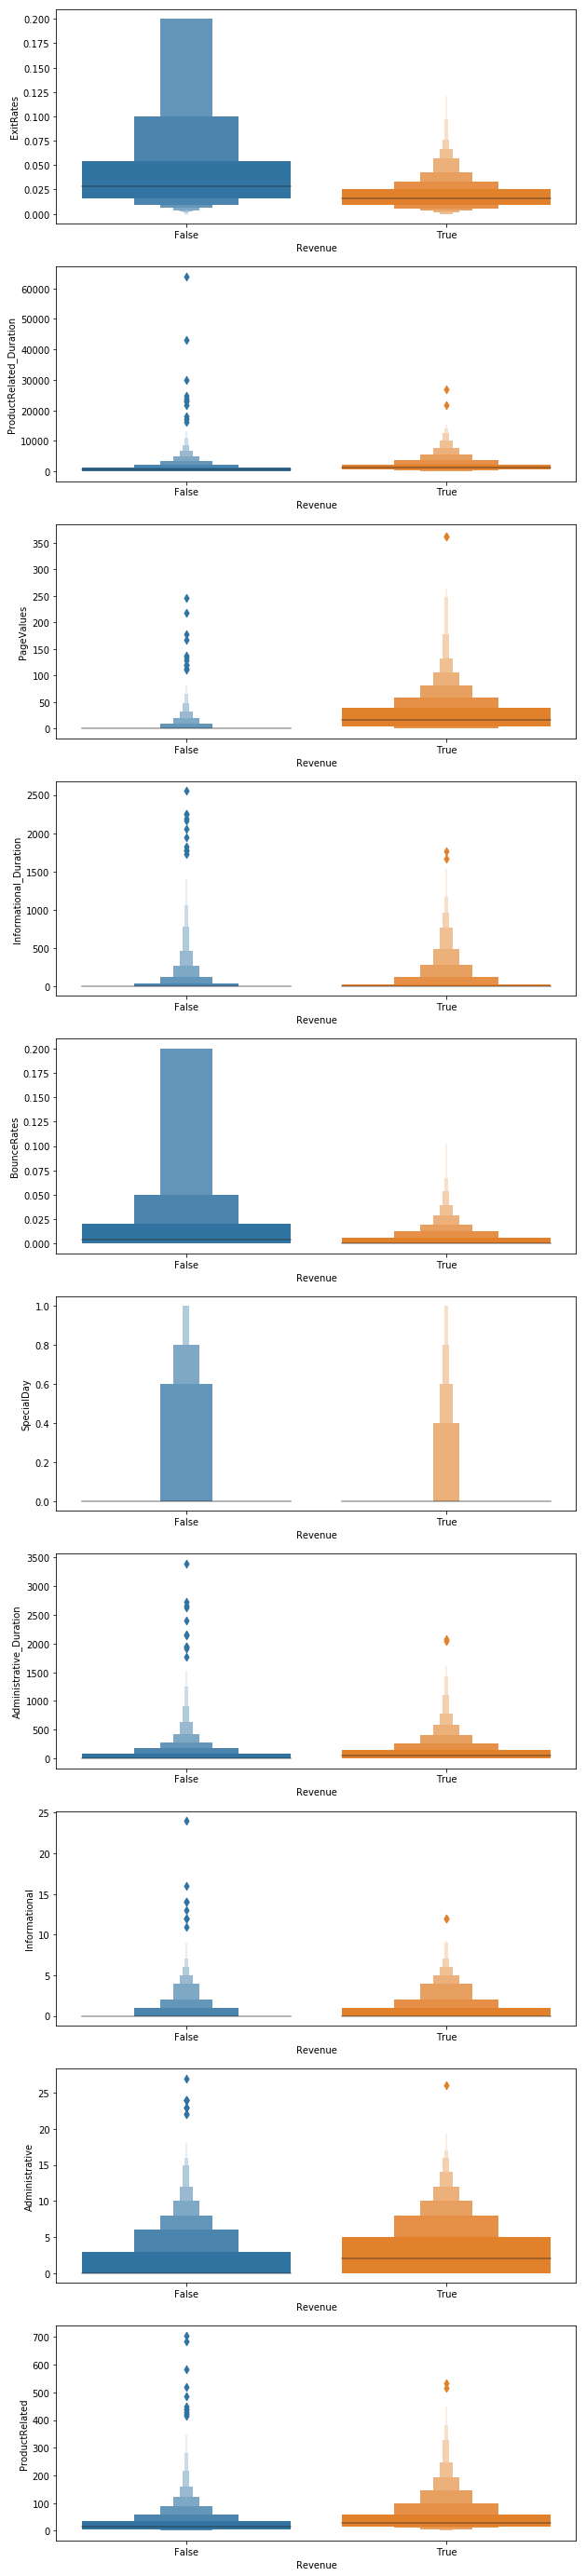

In [22]:

df[cat_cols] =df[cat_cols].astype('category') 
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.boxenplot(y=col,x='Revenue',data=df[numeric_cols + ['Revenue']],ax=ax[idx])

In [23]:
df['Administrative']=df['Administrative'].clip(upper=20)
df['PageValues']=df['PageValues'].clip(upper=250)
df['Administrative_Duration']=df['Administrative_Duration'].clip(upper=1500)
df['Informational']=df['Informational'].clip(upper=10)
df['ProductRelated_Duration']=df['ProductRelated_Duration'].clip(upper=20000)
df['ProductRelated']=df['ProductRelated'].clip(upper=600)
df['Informational_Duration']=df['Informational_Duration'].clip(upper=1500)

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=True)
transformed_df = pd.DataFrame(pt.fit_transform(df[numeric_cols]),columns=numeric_cols)
transformed_df[cat_cols]=df[cat_cols]
transformed_df=transformed_df.dropna()
transformed_0 = transformed_df[transformed_df['Revenue']==0]
transformed_1 = transformed_df[transformed_df['Revenue']==1]
transformed_df.isna().sum()

ExitRates                  0
ProductRelated_Duration    0
PageValues                 0
Informational_Duration     0
BounceRates                0
SpecialDay                 0
Administrative_Duration    0
Informational              0
Administrative             0
ProductRelated             0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Month                      0
dtype: int64

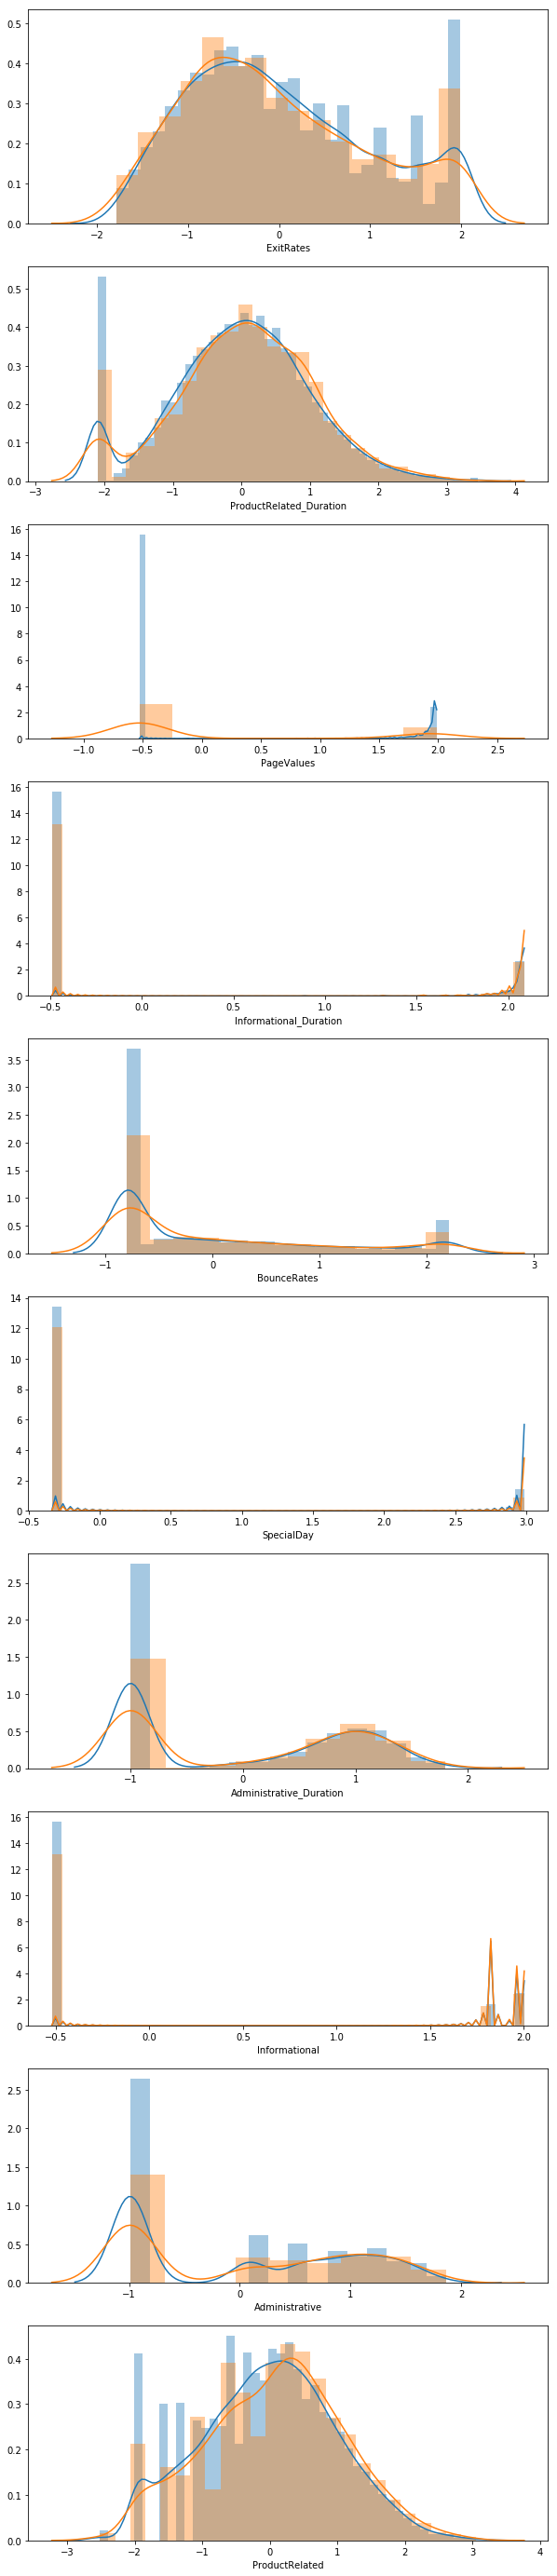

In [25]:
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.distplot(transformed_0[col],ax=ax[idx])
    sns.distplot(transformed_1[col],ax=ax[idx])

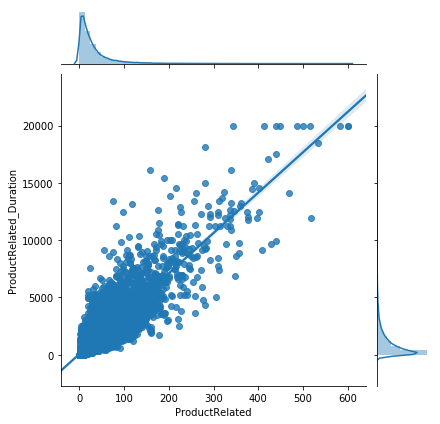

In [26]:
sns.jointplot(x="ProductRelated" ,y="ProductRelated_Duration",data=df[numeric_cols],kind="reg")

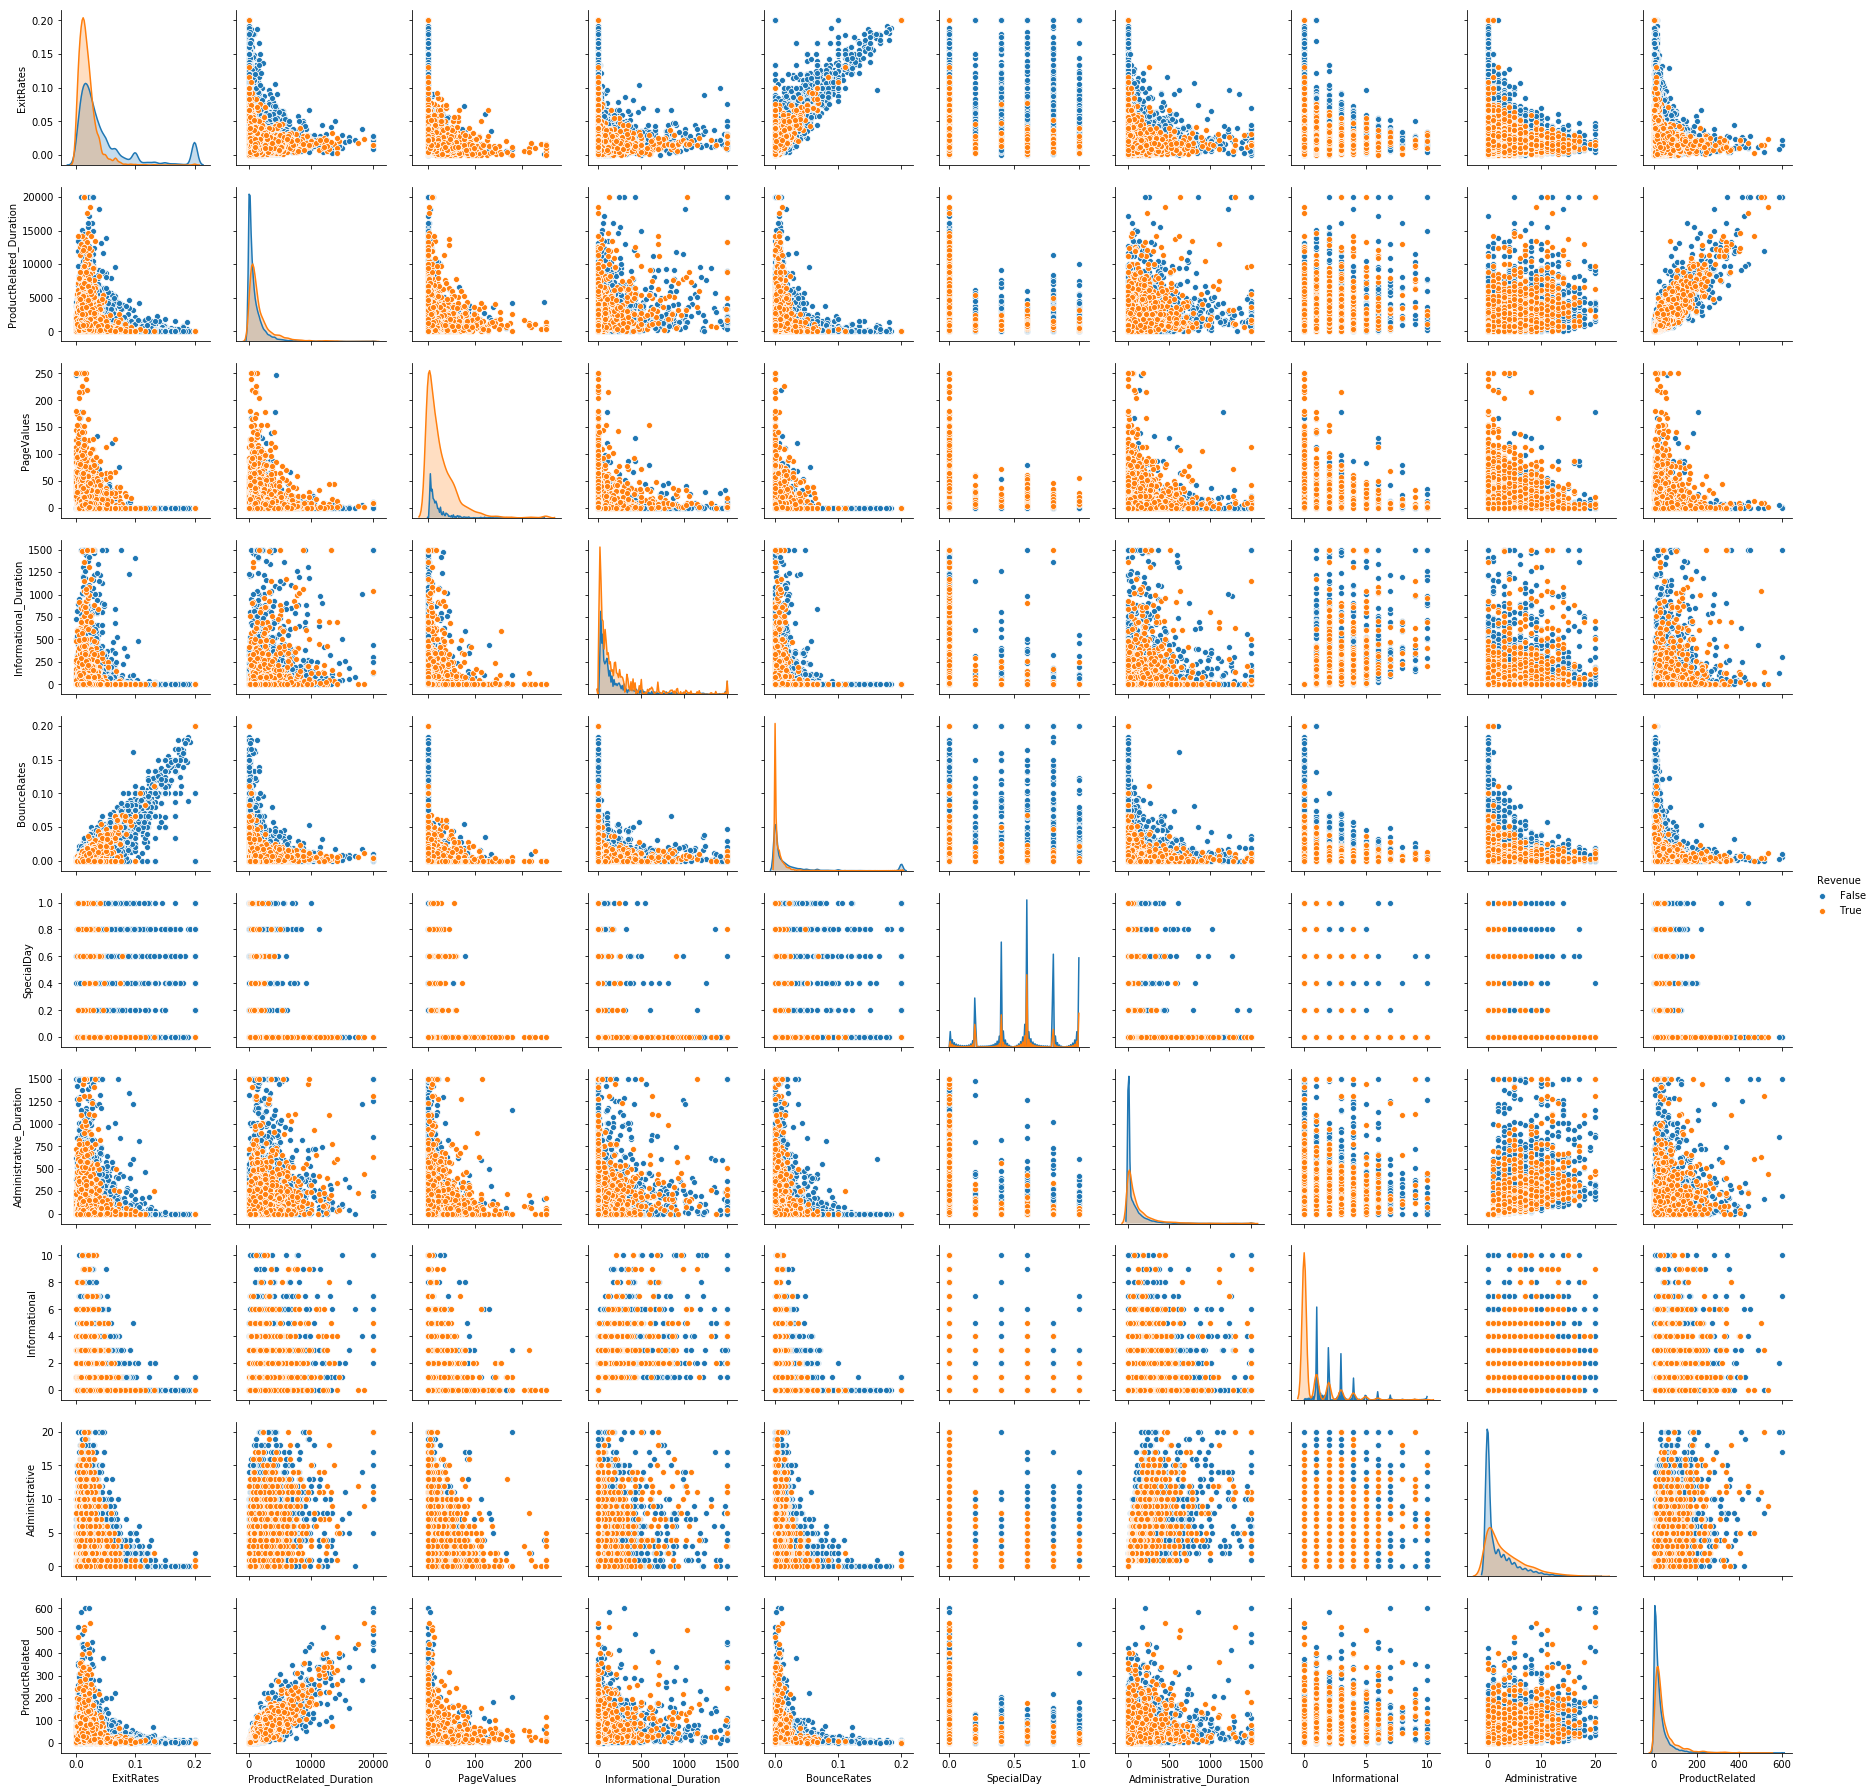

In [27]:
sns.pairplot(df,vars=numeric_cols,hue='Revenue')

In [ ]:
sns.pairplot(transformed_df.sample(frac=0.1),vars=numeric_cols,hue='Revenue')